In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred = regressor.predict(X_test)
y_pred

array([127.05369855, 116.79469933, 139.41470087, 121.75310048,
        94.43450072, 155.00080057, 117.7132013 , 113.28370148,
       153.23170035, 105.64210028, 103.22369889, 120.39420041,
        91.9731992 , 158.06680086, 121.49569857, 117.27940085,
        86.29449802,  91.9209994 ,  92.72490014, 125.76450005,
        83.50369945, 117.79849951, 126.11889856, 173.50289765,
       169.63039718, 139.36640233, 114.86129946, 159.88270186,
       134.02930053, 116.17190047, 111.48740062, 104.781402  ,
       128.16400056, 122.06499853,  98.6754999 , 120.13879999,
        83.24770066, 115.18010027, 127.44069866, 140.13509854,
       107.22360124, 131.60950007, 108.65819929, 134.18200008,
       133.58659948, 148.93289925, 119.53210071, 156.18320089,
       156.85650157, 127.63749949, 123.57180059, 114.64309859,
       123.85290096, 118.86029966, 153.96000023, 121.55489939,
       112.2476005 ,  86.76139907, 156.02019998, 118.10650106,
        88.63049971, 114.95389995,  83.16359931, 146.54

In [9]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
1255,128.789993,127.053699
2100,115.620003,116.794699
711,139.220001,139.414701
1328,120.930000,121.753100
53,93.040001,94.434501
...,...,...
140,76.790001,77.470500
1902,129.110001,128.140300
5,86.550003,86.765499
58,93.459999,94.424001


In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.352058498689955
Mean Squared Error: 6.727349600930363
Root Mean Squared Error: 2.5937134770306383


In [11]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.35 degrees.
Accuracy: 98.9 %.


g:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
g:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


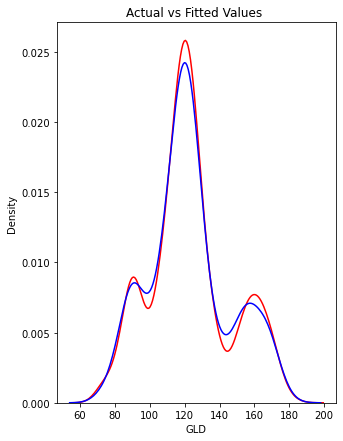

In [12]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')


plt.show()
plt.close()